In [2]:
%pip install numpy
%pip install pandas
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df_train=pd.read_csv('data/train.csv')
df_store=pd.read_csv('data/store.csv')

/tmp/ipykernel_28061/1131126083.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train=pd.read_csv('data/train.csv')


## Datacleaning

# train.csv

In [5]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
df_train.columns=['store',
    'day_of_week',
    'date',
    'sales',
    'customers',
    'open',
    'promo',
    'state_holiday',
    'school_holiday']

In [7]:
df_train['state_holiday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

Zu Klassifizieren mit '0':0;'a':1;'b':2;'c':3 

In [8]:
df_train['state_holiday']=df_train['state_holiday'].replace('0',0)
df_train['state_holiday']=df_train['state_holiday'].replace('a',1)
df_train['state_holiday']=df_train['state_holiday'].replace('b',2)
df_train['state_holiday']=df_train['state_holiday'].replace('c',3)

df_train['state_holiday']=df_train['state_holiday'].astype(int)

df_train['state_holiday'].unique()

array([0, 1, 2, 3])

'Date' als Datetime formatieren und Tag Monat und Jahr seperat auslesen.

In [9]:
df_train['date']=pd.to_datetime(df_train['date'])

df_train['year']=df_train['date'].dt.year

df_train['month']=df_train['date'].dt.month

df_train['day']=df_train['date'].dt.day

df_train['week_of_year']=df_train['date'].dt.weekofyear

/tmp/ipykernel_28061/2819681802.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_train['week_of_year']=df_train['date'].dt.weekofyear


Zusatzlich Spalten für Monats- / Jahres- / Quartalsanfang / -ende anlegen.

In [10]:
df_train['is_month_end']=df_train['date'].dt.is_month_end

df_train['is_month_start']=df_train['date'].dt.is_month_start

df_train['is_quarter_end']=df_train['date'].dt.is_quarter_end

df_train['is_quarter_start']=df_train['date'].dt.is_quarter_start

df_train['is_year_end']=df_train['date'].dt.is_year_end

df_train['is_year_start']=df_train['date'].dt.is_year_start

# store.csv

In [11]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [12]:
df_store[df_store['CompetitionOpenSinceMonth'].isnull()]['CompetitionDistance'].unique()

array([1.070e+03, 3.100e+02, 3.270e+03, 3.240e+03, 1.040e+03, 2.300e+03,
       2.170e+03, 2.910e+03, 1.800e+02, 1.180e+03, 2.900e+02, 4.880e+03,
       2.050e+03, 2.256e+04, 7.660e+03, 2.500e+02, 1.130e+03, 4.840e+03,
       3.300e+02, 3.320e+03, 7.910e+03, 2.710e+03, 2.410e+03, 2.400e+02,
       1.669e+04, 1.462e+04, 8.980e+03, 1.793e+04, 2.440e+03, 6.190e+03,
       7.890e+03, 4.510e+03, 2.000e+03, 2.460e+03, 9.000e+02, 5.190e+03,
       1.540e+03, 1.657e+04, 2.800e+02, 8.540e+03, 1.780e+03, 1.642e+04,
       3.050e+03, 1.184e+04, 1.254e+04, 2.640e+03, 1.100e+02, 1.309e+04,
       4.130e+03, 3.770e+03, 1.710e+03, 4.800e+02, 1.390e+03, 9.670e+03,
       3.560e+03, 1.936e+04, 8.500e+02, 5.200e+02, 1.697e+04, 2.200e+02,
       2.026e+04, 3.800e+02, 6.870e+03, 1.500e+02, 1.900e+02, 3.150e+03,
       6.400e+02, 7.930e+03, 4.500e+02, 2.370e+03, 1.080e+04, 1.890e+03,
       4.370e+03, 3.200e+02, 6.100e+02, 7.800e+02, 1.310e+03, 3.520e+03,
       3.400e+02, 2.233e+04, 2.100e+02, 4.580e+03, 

In [13]:
df_store[df_store['Promo2']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 1113
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      544 non-null    int64  
 1   StoreType                  544 non-null    object 
 2   Assortment                 544 non-null    object 
 3   CompetitionDistance        542 non-null    float64
 4   CompetitionOpenSinceMonth  396 non-null    float64
 5   CompetitionOpenSinceYear   396 non-null    float64
 6   Promo2                     544 non-null    int64  
 7   Promo2SinceWeek            0 non-null      float64
 8   Promo2SinceYear            0 non-null      float64
 9   PromoInterval              0 non-null      object 
dtypes: float64(5), int64(2), object(3)
memory usage: 46.8+ KB


Die Werte für Promo2SinceWeek, Promo2SinceYear und PromoInterval sind genau dann Null, wenn Promo2==0 gilt.
Die Spalten mit Buchstaben auf numerische WErte umsetzen.

In [14]:
#set assortment to numeric values
df_store['Assortment'] = df_store['Assortment'].map({'a': 1, 'b': 2, 'c': 3})

In [15]:
#set storetype to numeric values
df_store['StoreType'] = df_store['StoreType'].map({'a': 1, 'b': 2, 'c': 3, 'd': 4})

df_store.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   int64  
 2   Assortment                 1115 non-null   int64  
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 87.2+ KB


In [16]:
#convert to snake case
df_store.columns = ['store',
 'storetype',
 'assortment',
 'competition_distance',
 'competition_open_since_month',
 'competition_open_since_year',
 'promo2',
 'promo2_since_week',
 'promo2_since_year',
 'promo_interval']

df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   store                         1115 non-null   int64  
 1   storetype                     1115 non-null   int64  
 2   assortment                    1115 non-null   int64  
 3   competition_distance          1112 non-null   float64
 4   competition_open_since_month  761 non-null    float64
 5   competition_open_since_year   761 non-null    float64
 6   promo2                        1115 non-null   int64  
 7   promo2_since_week             571 non-null    float64
 8   promo2_since_year             571 non-null    float64
 9   promo_interval                571 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 87.2+ KB


In [17]:
#set promo_interval to numeric values
df_store['promo_interval'] = df_store['promo_interval'].map({'Jan,Apr,Jul,Oct': 1, 'Feb,May,Aug,Nov': 2, 'Mar,Jun,Sept,Dec': 3})



In [18]:
#fill missing values for promo2_since_week and promo2_since_year and promo_interval
df_store['promo2_since_week'] = df_store['promo2_since_week'].fillna(-1)
df_store['promo2_since_year'] = df_store['promo2_since_year'].fillna(-1)
df_store['promo_interval'] = df_store['promo_interval'].fillna(-1)




In [19]:
#fill missing values for competition_open_since_month and competition_open_since_year with mean
df_store['competition_open_since_month'] = df_store['competition_open_since_month'].fillna(df_store['competition_open_since_month'].mean())
df_store['competition_open_since_year'] = df_store['competition_open_since_year'].fillna(df_store['competition_open_since_year'].mean())
#also fill missing values for competition_distance with mean
df_store['competition_distance'] = df_store['competition_distance'].fillna(df_store['competition_distance'].mean())


In [20]:
df_store.head()

,store,storetype,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,3,1,1270.0,9.0,2008.0,0,-1.0,-1.0,-1.0
1,2,1,1,570.0,11.0,2007.0,1,13.0,2010.0,1.0
2,3,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,1.0
3,4,3,3,620.0,9.0,2009.0,0,-1.0,-1.0,-1.0
4,5,1,1,29910.0,4.0,2015.0,0,-1.0,-1.0,-1.0


# merge train and store data

In [21]:
#merge train and store data
df_train_store = pd.merge(df_train, df_store, how='left', on='store')

In [22]:
df_train_store.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,year,...,is_year_start,storetype,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,False,3,1,1270.0,9.0,2008.0,0,-1.0,-1.0,-1.0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,False,1,1,570.0,11.0,2007.0,1,13.0,2010.0,1.0
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,False,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,1.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,False,3,3,620.0,9.0,2009.0,0,-1.0,-1.0,-1.0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,False,1,1,29910.0,4.0,2015.0,0,-1.0,-1.0,-1.0


Um einen Überblick über die Stores zu bekommen, gucken welche art wie oft auftaucht

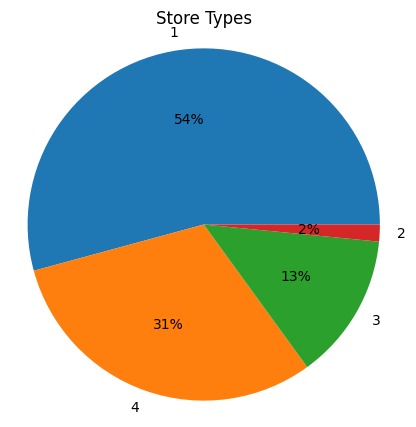

In [23]:
#make a pie chart of the different store types
df_train_store['storetype'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(5,5))
plt.axis('equal')
plt.title('Store Types')
plt.ylabel('')
plt.show()

Da keine wirkliche Angabe gemacht wird, was die Store Types Aussagen; nochmal das gleiche für assortments

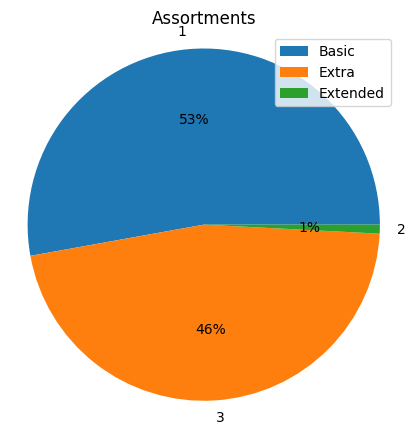

In [24]:
#create a pie chart of the different assortments
df_train_store['assortment'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(5,5))
plt.axis('equal')
plt.title('Assortments')
plt.ylabel('')
#make a legend where 1 is basic, 2 is extra and 3 is extended
plt.legend(['Basic', 'Extra', 'Extended'])
plt.show()

Die Art "Extra" wird von Rossmann kaum eingesetzt. Fast ausschließlich basic oder extended

will Plotten wie die Competitiondistance sich auf die Sales auswirkt. Bis jetzt bissl kake

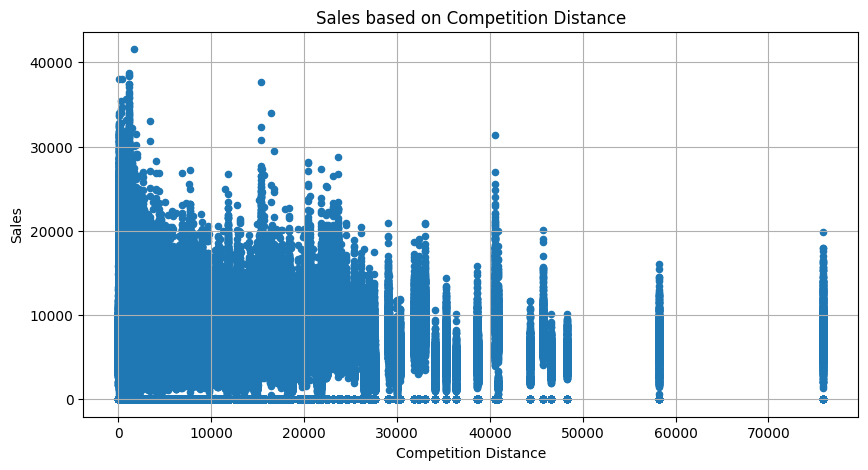

In [25]:
#plot the sales for each store based on the competition distance of the store as a scatter plot
df_train_store.plot.scatter(x='competition_distance', y='sales', figsize=(10,5))
plt.title('Sales based on Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
#use smaller dots to make the plot more readable and add a grid 
plt.scatter(x='competition_distance', y='sales', data=df_train_store, s=0.5)
plt.grid()
plt.show()



Es ist mir leider nicht wirklich gelungen den passenden Graphen zu erstellen. Allerdings ist zu erkennen, dass niedrige Comp. Distance mehr Sales mit sich bringt. Dies würde ich damit begründen, dass diese Rossmanns in Einkaufszentren u.Ä. sitzen und somit sowieso viel besucht werden.

Als alternative möchte ich schauen, ob Stores mit naher Competition mehr Werbung machen.

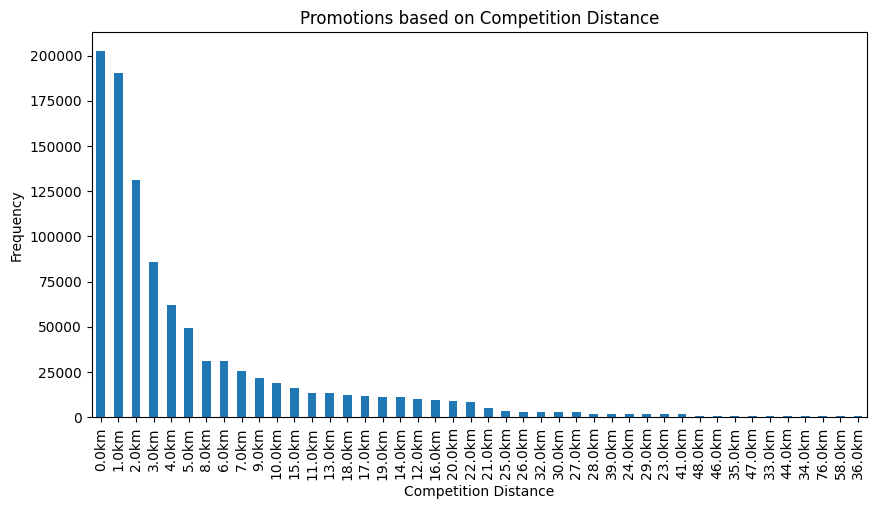

In [26]:
#create a plot showing the frequency of promotions based on competition distance
# first create a new column with the competition distance divided by 1000
df_train_store['competition_distance_1000'] = df_train_store['competition_distance'] / 1000
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].round()
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].astype(str)
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'] + 'km'
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].replace('0km', '0')
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].replace('nankm', 'nan')
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].replace('nan', '0')

#plot the frequency of promotions based on competition distance
df_train_store['competition_distance_1000'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Promotions based on Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Frequency')

plt.show()



Ersmtal nicht zu schlecht, aber nach einigen probieren gefällt mir frequency nicht.

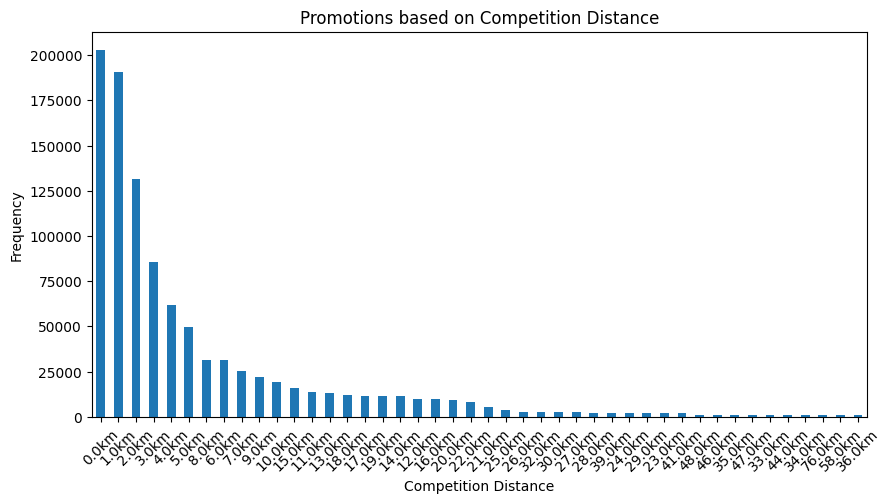

In [27]:
#create a new column with the competition distance divided by 1000
df_train_store['competition_distance_1000'] = df_train_store['competition_distance'] / 1000
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].round()
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].astype(str)
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'] + 'km'
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].replace('0km', '0')
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].replace('nankm', 'nan')
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].replace('nan', '0')
#plot the frequency of promotions based on competition distance
df_train_store['competition_distance_1000'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Promotions based on Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Frequency')
#visually remove the values of the y-axis
#rotate the x-axis labels 45 degrees
plt.xticks(rotation=45)
plt.show()


Da ich Frequency in keinen Sinvolleren Rahmen bekomme, nochmal etwas kosmetik

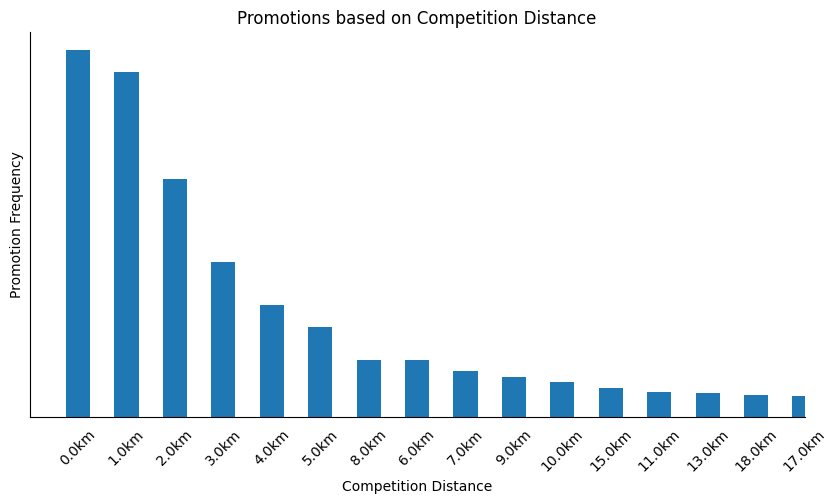

In [31]:
df_train_store['competition_distance_1000'] = df_train_store['competition_distance'] / 1000
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].round()
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].astype(str)
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'] + 'km'
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].replace('0km', '0')
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].replace('nankm', 'nan')
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].replace('nan', '0')
df_train_store['competition_distance_1000'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Promotions based on Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Promotion Frequency')
plt.xticks(rotation=45)
#remove the last 15 values of the x-axis
plt.xlim(-1, 15)
#remove the top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#also remove the ticks on the y-axis and x-axis
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.tick_params(axis='x', which='both', top=False, bottom=False, labelbottom=True)
plt.show()
